In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from code_folder.sensitivity import error_map_by_Artyom
from code_folder.visualization_functions import geological_environment

In [10]:
r = np.logspace(-1,3,10)
param0 = [100,10,20,5,50]
changed_indexes=[2, 3] # первый индекс - ось y, второй - x
meth='U'
change_size=10
n = 51

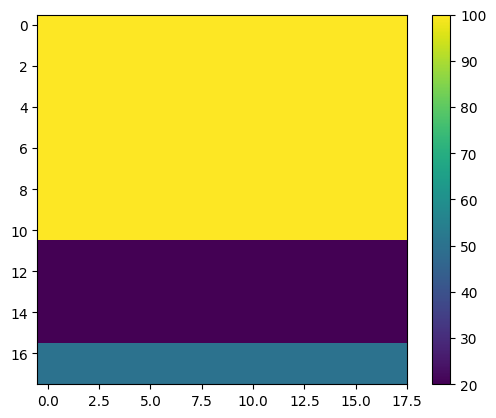

In [11]:
plt.imshow(geological_environment(param0))
plt.colorbar()

In [12]:
error_map=error_map_by_Artyom(r,
                        param0, 
                        changed_indexes, 
                        n, 
                        meth,
                        change_size)

  0%|          | 0/51 [00:00<?, ?it/s]

In [13]:
if changed_indexes[1] %2 == 0:
    x_label=f'сопротивление {1+int(changed_indexes[1]/2)}  слоя, ом'
else:
    x_label=f'мощность {1+int(changed_indexes[1]/2)}  слоя, м'

if changed_indexes[0] %2 == 0:
    y_label=f'сопротивление {1+int(changed_indexes[0]/2)}  слоя, ом'
else:
    y_label=f'мощность {1+int(changed_indexes[0]/2)}  слоя, м'

отображение в обычном масштабе осей

In [14]:
y_arr_log = np.logspace(np.log10(param0[changed_indexes[0]]/change_size), np.log10(param0[changed_indexes[0]]*change_size), n)
x_arr_log = np.logspace(np.log10(param0[changed_indexes[1]]/change_size), np.log10(param0[changed_indexes[1]]*change_size), n)

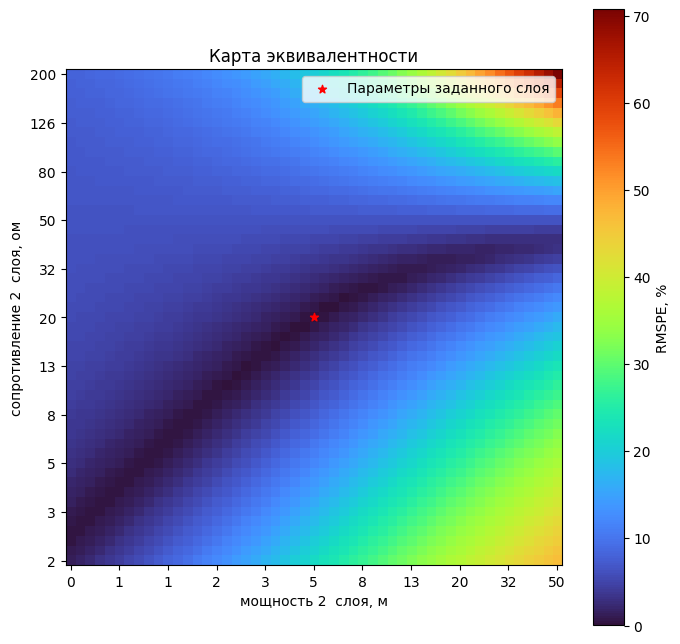

In [15]:
fig=plt.figure(figsize=(8,8))
plt.imshow(error_map,cmap='turbo')
plt.colorbar(label='RMSPE, %')
plt.gca().invert_yaxis()

plt.scatter([int(n/2)],
            [int(n/2)],
            c='r', marker='*', label='Параметры заданного слоя')

plt.xlabel(x_label)
plt.ylabel(y_label)

k=5 # как часто отображать подписи на осях
plt.xticks([i for i in range(n)][::k],[str(round(x)) for x in x_arr_log][::k])
plt.yticks([i for i in range(n)][::k],[str(round(y)) for y in y_arr_log][::k])

plt.title('Карта эквивалентности')
plt.legend()